In [76]:
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import tensorflow as tf
import sys
import json
import matplotlib.pyplot as plt

Quantify bias of embeddings by measuring the proportion of socially-biased male and female neighbors of the target word (in this case, professions) -- see Goldberg's "Lipstick on a Pig"

In [42]:
vocab_size = 22000
vector_dim = 100
k_knn = 20

In [54]:
wiki_model = Word2Vec.load("english-wikipedia-articles-20170820-models/enwiki_2017_08_20_fasttext.model")

In [55]:
orig_biased_vecs = wiki_model.wv.vectors[:vocab_size]

In [43]:
bolukbasi_debiased_vecs = np.load('bolukbasi_debiased_vecs.npy')

In [44]:
prob_debiased_vecs = np.load('fasttext_wiki_debias_prob_wvs.npy')

In [45]:
cluster_debiased_vecs = np.load('fasttext_wiki_debias_cluster_wvs.npy')


In [46]:
professions = np.load('professions.npy')
professions_inds = np.load('professions_inds.npy')

In [47]:
len(professions)

221

In [48]:
male_neighbors = np.load('male_neighbors.npy')
male_neighbors_inds = np.array([wiki_model.wv.vocab[w].index for w in male_neighbors])


In [49]:
female_neighbors = np.load('female_neighbors.npy')
female_neighbors_inds = np.array([wiki_model.wv.vocab[w].index for w in female_neighbors])

In [50]:
neigbors = np.concatenate((female_neighbors,male_neighbors))

In [51]:
neighbors_inds = np.concatenate([female_neighbors_inds,male_neighbors_inds])


In [52]:
len(neighbors_inds)

1000

In [53]:
len(neighbors_inds)//2

500

In [116]:
professions_vecs = cluster_debiased_vecs[professions_inds]

neighbors_vecs = cluster_debiased_vecs[neighbors_inds]


# tf Graph Input
neighbors = tf.placeholder("float", [None, vector_dim],name='neighbors')
profession = tf.placeholder("float", [vector_dim],name='profession')

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(neighbors, tf.negative(profession))), reduction_indices=1)

# Nearest Neighbor calculation using L2 Distance
# Calculate L2 Distance
# distance = tf.sqrt(tf.reduce_sum(tf.squared_difference(neighbors, profession), reduction_indices=1))

vals,inds = tf.math.top_k(tf.negative(distance),k=k_knn)

bools = tf.math.greater(inds,(len(neighbors_inds)//2))

proportion = tf.reduce_mean(tf.cast(bools, tf.float32)) 

# accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # loop over target words
    props={}
    for i in range(len(professions_vecs)):

        # Get nearest neighbors 
        
        # Report proportion male
        prop = sess.run(proportion, feed_dict={neighbors: neighbors_vecs, profession: professions_vecs[i, :]})
        print("Target", professions[i], "Prop Male:", prop)
        props[professions[i]] = prop
    
#         Report neighbors
#         if professions[i] in profession_examples:
#             inds_res = sess.run(inds, feed_dict={neighbors: neighbors_vecs, profession: professions_vecs[i, :]})
#             inds_ns = neighbors_inds[inds_res]
#             ns = np.array([wiki_model.wv.index2word[ind] for ind in inds_ns])
#             print("Target:", professions[i], "KNN:", ns)
        
#         if professions[i] == 'ballerina':
#             distance = sess.run(distance, feed_dict={neighbors: neighbors_vecs, profession: professions_vecs[i, :]})
#             print("Target:", professions[i], "KNN:", distance)
#             np.save('distance_ex', distance)
            
    print(props)
    print("Done!")
    

Target accountant Prop Male: 0.5
Target acquaintance Prop Male: 0.55
Target actor Prop Male: 0.4
Target actress Prop Male: 0.6
Target administrator Prop Male: 0.55
Target adventurer Prop Male: 0.55
Target advocate Prop Male: 0.55
Target aide Prop Male: 0.5
Target alderman Prop Male: 0.4
Target ambassador Prop Male: 0.5
Target analyst Prop Male: 0.5
Target anthropologist Prop Male: 0.4
Target archaeologist Prop Male: 0.5
Target archbishop Prop Male: 0.6
Target architect Prop Male: 0.4
Target artist Prop Male: 0.5
Target assassin Prop Male: 0.5
Target astronaut Prop Male: 0.7
Target astronomer Prop Male: 0.45
Target athlete Prop Male: 0.65
Target attorney Prop Male: 0.45
Target author Prop Male: 0.35
Target baker Prop Male: 0.45
Target banker Prop Male: 0.5
Target barber Prop Male: 0.45
Target baron Prop Male: 0.55
Target barrister Prop Male: 0.55
Target bartender Prop Male: 0.45
Target biologist Prop Male: 0.55
Target bishop Prop Male: 0.45
Target bodyguard Prop Male: 0.5
Target boss Pr

In [57]:
props_o = {'accountant': 0.05, 'acquaintance': 0.15, 'actor': 0.9, 'actress': 0.0, 'administrator': 0.35, 'adventurer': 0.85, 'advocate': 0.0, 'aide': 0.7, 'alderman': 1.0, 'ambassador': 0.5, 'analyst': 0.1, 'anthropologist': 0.45, 'archaeologist': 0.65, 'archbishop': 1.0, 'architect': 1.0, 'artist': 0.3, 'assassin': 0.8, 'astronaut': 0.85, 'astronomer': 1.0, 'athlete': 0.45, 'attorney': 1.0, 'author': 0.75, 'baker': 1.0, 'banker': 1.0, 'barber': 1.0, 'baron': 0.95, 'barrister': 0.9, 'bartender': 0.75, 'biologist': 0.65, 'bishop': 1.0, 'bodyguard': 0.75, 'boss': 0.95, 'boxer': 1.0, 'broadcaster': 0.65, 'broker': 0.95, 'businessman': 0.9, 'butcher': 1.0, 'butler': 1.0, 'captain': 1.0, 'caretaker': 0.85, 'carpenter': 1.0, 'cartoonist': 0.95, 'cellist': 0.6, 'chancellor': 0.85, 'chaplain': 0.85, 'character': 0.15, 'chef': 0.7, 'chemist': 0.85, 'choreographer': 0.2, 'cinematographer': 0.65, 'citizen': 0.0, 'cleric': 0.95, 'clerk': 1.0, 'coach': 1.0, 'collector': 0.6, 'colonel': 1.0, 'columnist': 0.9, 'comedian': 0.65, 'comic': 0.0, 'commander': 1.0, 'commentator': 0.7, 'commissioner': 0.65, 'composer': 0.8, 'conductor': 0.8, 'confesses': 0.0, 'congressman': 1.0, 'constable': 0.2, 'consultant': 0.0, 'cop': 0.7, 'correspondent': 0.05, 'counselor': 0.15, 'critic': 0.0, 'crusader': 0.95, 'curator': 0.5, 'dad': 0.75, 'dancer': 0.0, 'dean': 1.0, 'dentist': 0.3, 'deputy': 0.85, 'detective': 0.15, 'diplomat': 0.8, 'director': 0.65, 'doctor': 0.7, 'drummer': 1.0, 'economist': 0.1, 'editor': 0.85, 'educator': 0.4, 'employee': 0.0, 'entertainer': 0.4, 'entrepreneur': 0.3, 'envoy': 0.85, 'evangelist': 0.8, 'farmer': 0.9, 'filmmaker': 0.45, 'financier': 0.55, 'fisherman': 0.65, 'footballer': 1.0, 'foreman': 1.0, 'gangster': 0.65, 'gardener': 0.65, 'geologist': 0.85, 'goalkeeper': 1.0, 'guitarist': 1.0, 'headmaster': 0.9, 'historian': 0.7, 'hooker': 1.0, 'illustrator': 0.75, 'industrialist': 0.15, 'inspector': 0.7, 'instructor': 0.45, 'inventor': 0.9, 'investigator': 0.1, 'journalist': 0.65, 'judge': 0.95, 'jurist': 0.6, 'landlord': 0.75, 'lawyer': 0.85, 'lecturer': 0.7, 'legislator': 0.45, 'librarian': 0.3, 'lieutenant': 1.0, 'lyricist': 0.6, 'maestro': 0.2, 'magician': 0.85, 'magistrate': 0.2, 'maid': 0.05, 'manager': 1.0, 'marshal': 1.0, 'mathematician': 0.95, 'mechanic': 0.15, 'midfielder': 1.0, 'minister': 0.5, 'missionary': 0.25, 'monk': 1.0, 'musician': 0.9, 'nanny': 0.0, 'narrator': 0.55, 'naturalist': 0.6, 'novelist': 0.45, 'nun': 0.1, 'nurse': 0.05, 'observer': 0.0, 'officer': 0.95, 'organist': 0.75, 'painter': 0.7, 'pastor': 0.85, 'performer': 0.25, 'philanthropist': 0.7, 'philosopher': 0.8, 'photographer': 0.45, 'physician': 0.8, 'physicist': 0.85, 'pianist': 0.65, 'planner': 0.15, 'playwright': 0.8, 'poet': 0.55, 'policeman': 0.65, 'politician': 0.85, 'preacher': 0.7, 'president': 0.6, 'priest': 0.9, 'principal': 0.35, 'prisoner': 0.6, 'professor': 0.8, 'programmer': 0.15, 'promoter': 0.4, 'proprietor': 0.55, 'prosecutor': 0.3, 'protagonist': 0.1, 'provost': 0.55, 'psychiatrist': 0.35, 'psychologist': 0.55, 'rabbi': 1.0, 'ranger': 0.9, 'researcher': 0.0, 'sailor': 0.55, 'saint': 0.7, 'salesman': 0.75, 'saxophonist': 1.0, 'scholar': 0.6, 'scientist': 0.3, 'screenwriter': 0.55, 'sculptor': 0.9, 'secretary': 0.6, 'senator': 1.0, 'sergeant': 1.0, 'servant': 0.65, 'singer': 0.25, 'skipper': 0.95, 'sociologist': 0.55, 'soldier': 0.9, 'solicitor': 0.7, 'soloist': 0.35, 'sportsman': 0.95, 'statesman': 0.95, 'steward': 1.0, 'student': 0.0, 'substitute': 0.85, 'superintendent': 0.6, 'surgeon': 0.75, 'surveyor': 0.7, 'swimmer': 0.35, 'teacher': 0.25, 'technician': 0.75, 'teenager': 0.55, 'therapist': 0.0, 'trader': 0.4, 'treasurer': 0.7, 'trooper': 0.95, 'trumpeter': 1.0, 'tutor': 0.7, 'tycoon': 0.7, 'violinist': 0.4, 'vocalist': 0.65, 'waiter': 0.7, 'waitress': 0.05, 'warden': 0.95, 'warrior': 0.7, 'worker': 0.1, 'wrestler': 1.0, 'writer': 0.8}


In [60]:
props_b = {'accountant': 0.15, 'acquaintance': 0.05, 'actor': 0.55, 'actress': 0.0, 'administrator': 0.5, 'adventurer': 0.9, 'advocate': 0.0, 'aide': 0.7, 'alderman': 1.0, 'ambassador': 0.95, 'analyst': 0.25, 'anthropologist': 0.8, 'archaeologist': 0.9, 'archbishop': 0.85, 'architect': 0.8, 'artist': 0.5, 'assassin': 0.75, 'astronaut': 0.9, 'astronomer': 0.9, 'athlete': 0.6, 'attorney': 1.0, 'author': 0.8, 'baker': 1.0, 'banker': 1.0, 'barber': 1.0, 'baron': 0.95, 'barrister': 1.0, 'bartender': 0.95, 'biologist': 0.8, 'bishop': 0.95, 'bodyguard': 0.85, 'boss': 0.85, 'boxer': 1.0, 'broadcaster': 0.65, 'broker': 1.0, 'businessman': 0.8, 'butcher': 1.0, 'butler': 1.0, 'captain': 1.0, 'caretaker': 0.9, 'carpenter': 1.0, 'cartoonist': 0.7, 'cellist': 0.8, 'chancellor': 0.9, 'chaplain': 0.9, 'character': 0.1, 'chef': 0.2, 'chemist': 0.85, 'choreographer': 0.15, 'cinematographer': 0.7, 'citizen': 0.15, 'cleric': 0.75, 'clerk': 0.95, 'coach': 1.0, 'collector': 0.9, 'colonel': 1.0, 'columnist': 0.9, 'comedian': 0.8, 'comic': 0.05, 'commander': 1.0, 'commentator': 0.3, 'commissioner': 1.0, 'composer': 0.8, 'conductor': 0.95, 'confesses': 0.0, 'congressman': 1.0, 'constable': 0.45, 'consultant': 0.1, 'cop': 0.65, 'correspondent': 0.15, 'counselor': 0.2, 'critic': 0.05, 'crusader': 1.0, 'curator': 0.9, 'dad': 0.2, 'dancer': 0.15, 'dean': 0.9, 'dentist': 0.25, 'deputy': 0.95, 'detective': 0.15, 'diplomat': 0.9, 'director': 0.95, 'doctor': 0.25, 'drummer': 1.0, 'economist': 0.25, 'editor': 0.9, 'educator': 0.6, 'employee': 0.05, 'entertainer': 0.4, 'entrepreneur': 0.15, 'envoy': 0.95, 'evangelist': 0.85, 'farmer': 0.8, 'filmmaker': 0.55, 'financier': 0.65, 'fisherman': 0.85, 'footballer': 1.0, 'foreman': 1.0, 'gangster': 0.6, 'gardener': 0.9, 'geologist': 0.85, 'goalkeeper': 1.0, 'guitarist': 1.0, 'headmaster': 0.9, 'historian': 0.7, 'hooker': 1.0, 'illustrator': 0.85, 'industrialist': 0.15, 'inspector': 0.85, 'instructor': 0.35, 'inventor': 0.75, 'investigator': 0.1, 'journalist': 0.85, 'judge': 0.9, 'jurist': 0.55, 'landlord': 0.7, 'lawyer': 0.75, 'lecturer': 0.45, 'legislator': 0.7, 'librarian': 0.6, 'lieutenant': 1.0, 'lyricist': 0.5, 'maestro': 0.2, 'magician': 0.5, 'magistrate': 0.55, 'maid': 0.05, 'manager': 1.0, 'marshal': 1.0, 'mathematician': 0.7, 'mechanic': 0.05, 'midfielder': 1.0, 'minister': 0.95, 'missionary': 0.55, 'monk': 0.65, 'musician': 0.85, 'nanny': 0.0, 'narrator': 0.4, 'naturalist': 0.6, 'novelist': 0.55, 'nun': 0.2, 'nurse': 0.05, 'observer': 0.05, 'officer': 0.85, 'organist': 0.7, 'painter': 0.85, 'pastor': 0.9, 'performer': 0.4, 'philanthropist': 0.9, 'philosopher': 0.6, 'photographer': 0.6, 'physician': 0.75, 'physicist': 0.8, 'pianist': 0.6, 'planner': 0.2, 'playwright': 0.8, 'poet': 0.75, 'policeman': 0.7, 'politician': 0.95, 'preacher': 0.5, 'president': 1.0, 'priest': 0.7, 'principal': 0.5, 'prisoner': 0.65, 'professor': 0.6, 'programmer': 0.0, 'promoter': 0.15, 'proprietor': 0.85, 'prosecutor': 0.6, 'protagonist': 0.15, 'provost': 0.6, 'psychiatrist': 0.2, 'psychologist': 0.3, 'rabbi': 0.95, 'ranger': 1.0, 'researcher': 0.05, 'sailor': 0.75, 'saint': 0.8, 'salesman': 0.7, 'saxophonist': 0.95, 'scholar': 0.3, 'scientist': 0.15, 'screenwriter': 0.8, 'sculptor': 0.8, 'secretary': 1.0, 'senator': 1.0, 'sergeant': 0.95, 'servant': 0.65, 'singer': 0.75, 'skipper': 0.9, 'sociologist': 0.65, 'soldier': 0.9, 'solicitor': 0.8, 'soloist': 0.45, 'sportsman': 0.9, 'statesman': 0.85, 'steward': 1.0, 'student': 0.0, 'substitute': 0.95, 'superintendent': 0.7, 'surgeon': 0.75, 'surveyor': 0.75, 'swimmer': 0.6, 'teacher': 0.05, 'technician': 0.35, 'teenager': 0.3, 'therapist': 0.0, 'trader': 0.25, 'treasurer': 1.0, 'trooper': 1.0, 'trumpeter': 1.0, 'tutor': 0.6, 'tycoon': 0.7, 'violinist': 0.65, 'vocalist': 0.9, 'waiter': 0.8, 'waitress': 0.15, 'warden': 1.0, 'warrior': 0.8, 'worker': 0.15, 'wrestler': 1.0, 'writer': 0.8}

In [62]:
props_p = {'accountant': 0.0, 'acquaintance': 0.05, 'actor': 0.15, 'actress': 0.15, 'administrator': 0.05, 'adventurer': 0.95, 'advocate': 0.05, 'aide': 0.45, 'alderman': 1.0, 'ambassador': 0.7, 'analyst': 0.1, 'anthropologist': 0.3, 'archaeologist': 0.6, 'archbishop': 1.0, 'architect': 0.5, 'artist': 0.45, 'assassin': 0.9, 'astronaut': 0.65, 'astronomer': 0.95, 'athlete': 0.3, 'attorney': 0.6, 'author': 0.65, 'baker': 1.0, 'banker': 1.0, 'barber': 1.0, 'baron': 1.0, 'barrister': 0.95, 'bartender': 1.0, 'biologist': 0.85, 'bishop': 1.0, 'bodyguard': 0.85, 'boss': 1.0, 'boxer': 1.0, 'broadcaster': 0.6, 'broker': 1.0, 'businessman': 0.9, 'butcher': 1.0, 'butler': 0.95, 'captain': 0.8, 'caretaker': 0.9, 'carpenter': 0.85, 'cartoonist': 0.8, 'cellist': 0.7, 'chancellor': 0.85, 'chaplain': 0.95, 'character': 0.05, 'chef': 0.75, 'chemist': 0.8, 'choreographer': 0.7, 'cinematographer': 0.85, 'citizen': 0.0, 'cleric': 0.8, 'clerk': 1.0, 'coach': 0.95, 'collector': 0.25, 'colonel': 1.0, 'columnist': 0.8, 'comedian': 0.75, 'comic': 0.45, 'commander': 0.4, 'commentator': 0.5, 'commissioner': 0.25, 'composer': 0.4, 'conductor': 0.7, 'confesses': 0.0, 'congressman': 0.9, 'constable': 0.15, 'consultant': 0.05, 'cop': 0.85, 'correspondent': 0.25, 'counselor': 0.1, 'critic': 0.1, 'crusader': 1.0, 'curator': 0.6, 'dad': 0.7, 'dancer': 0.05, 'dean': 0.75, 'dentist': 0.3, 'deputy': 0.55, 'detective': 0.6, 'diplomat': 0.85, 'director': 0.4, 'doctor': 0.8, 'drummer': 1.0, 'economist': 0.25, 'editor': 0.45, 'educator': 0.35, 'employee': 0.1, 'entertainer': 0.4, 'entrepreneur': 0.55, 'envoy': 0.75, 'evangelist': 0.75, 'farmer': 0.05, 'filmmaker': 0.85, 'financier': 0.25, 'fisherman': 0.95, 'footballer': 1.0, 'foreman': 1.0, 'gangster': 0.95, 'gardener': 0.9, 'geologist': 0.85, 'goalkeeper': 1.0, 'guitarist': 1.0, 'headmaster': 0.95, 'historian': 0.55, 'hooker': 1.0, 'illustrator': 0.85, 'industrialist': 0.05, 'inspector': 0.9, 'instructor': 0.25, 'inventor': 0.8, 'investigator': 0.25, 'journalist': 0.55, 'judge': 0.55, 'jurist': 0.5, 'landlord': 0.6, 'lawyer': 0.65, 'lecturer': 0.35, 'legislator': 0.3, 'librarian': 0.65, 'lieutenant': 0.7, 'lyricist': 0.45, 'maestro': 0.25, 'magician': 0.75, 'magistrate': 0.4, 'maid': 0.0, 'manager': 0.6, 'marshal': 1.0, 'mathematician': 0.8, 'mechanic': 0.2, 'midfielder': 1.0, 'minister': 0.2, 'missionary': 0.25, 'monk': 0.65, 'musician': 0.7, 'nanny': 0.0, 'narrator': 0.3, 'naturalist': 0.6, 'novelist': 0.6, 'nun': 0.65, 'nurse': 0.0, 'observer': 0.05, 'officer': 0.6, 'organist': 0.6, 'painter': 0.75, 'pastor': 0.9, 'performer': 0.75, 'philanthropist': 0.85, 'philosopher': 0.35, 'photographer': 0.55, 'physician': 0.7, 'physicist': 0.55, 'pianist': 0.3, 'planner': 0.05, 'playwright': 0.75, 'poet': 0.85, 'policeman': 0.9, 'politician': 0.55, 'preacher': 0.6, 'president': 0.45, 'priest': 0.95, 'principal': 0.05, 'prisoner': 0.9, 'professor': 0.1, 'programmer': 0.0, 'promoter': 0.2, 'proprietor': 0.75, 'prosecutor': 0.1, 'protagonist': 0.4, 'provost': 0.4, 'psychiatrist': 0.15, 'psychologist': 0.55, 'rabbi': 1.0, 'ranger': 0.95, 'researcher': 0.05, 'sailor': 1.0, 'saint': 0.6, 'salesman': 1.0, 'saxophonist': 1.0, 'scholar': 0.45, 'scientist': 0.3, 'screenwriter': 0.75, 'sculptor': 0.75, 'secretary': 0.0, 'senator': 0.7, 'sergeant': 1.0, 'servant': 0.15, 'singer': 0.8, 'skipper': 0.95, 'sociologist': 0.45, 'soldier': 1.0, 'solicitor': 0.4, 'soloist': 0.6, 'sportsman': 1.0, 'statesman': 0.85, 'steward': 1.0, 'student': 0.0, 'substitute': 0.8, 'superintendent': 0.8, 'surgeon': 0.85, 'surveyor': 0.45, 'swimmer': 0.45, 'teacher': 0.5, 'technician': 0.7, 'teenager': 0.85, 'therapist': 0.0, 'trader': 0.3, 'treasurer': 0.65, 'trooper': 1.0, 'trumpeter': 1.0, 'tutor': 0.6, 'tycoon': 1.0, 'violinist': 0.7, 'vocalist': 1.0, 'waiter': 0.35, 'waitress': 0.35, 'warden': 1.0, 'warrior': 0.5, 'worker': 0.35, 'wrestler': 0.95, 'writer': 0.65}


In [69]:
props_c = {'accountant': 0.5, 'acquaintance': 0.55, 'actor': 0.4, 'actress': 0.6, 'administrator': 0.55, 'adventurer': 0.55, 'advocate': 0.55, 'aide': 0.5, 'alderman': 0.4, 'ambassador': 0.5, 'analyst': 0.5, 'anthropologist': 0.4, 'archaeologist': 0.5, 'archbishop': 0.6, 'architect': 0.4, 'artist': 0.5, 'assassin': 0.5, 'astronaut': 0.7, 'astronomer': 0.45, 'athlete': 0.65, 'attorney': 0.45, 'author': 0.35, 'baker': 0.45, 'banker': 0.5, 'barber': 0.45, 'baron': 0.55, 'barrister': 0.55, 'bartender': 0.45, 'biologist': 0.55, 'bishop': 0.45, 'bodyguard': 0.5, 'boss': 0.45, 'boxer': 0.25, 'broadcaster': 0.4, 'broker': 0.45, 'businessman': 0.65, 'butcher': 0.5, 'butler': 0.65, 'captain': 0.55, 'caretaker': 0.35, 'carpenter': 0.55, 'cartoonist': 0.5, 'cellist': 0.45, 'chancellor': 0.65, 'chaplain': 0.45, 'character': 0.45, 'chef': 0.4, 'chemist': 0.65, 'choreographer': 0.65, 'cinematographer': 0.45, 'citizen': 0.5, 'cleric': 0.6, 'clerk': 0.5, 'coach': 0.55, 'collector': 0.35, 'colonel': 0.5, 'columnist': 0.4, 'comedian': 0.3, 'comic': 0.55, 'commander': 0.65, 'commentator': 0.35, 'commissioner': 0.5, 'composer': 0.45, 'conductor': 0.5, 'confesses': 0.5, 'congressman': 0.5, 'constable': 0.55, 'consultant': 0.5, 'cop': 0.5, 'correspondent': 0.5, 'counselor': 0.5, 'critic': 0.5, 'crusader': 0.45, 'curator': 0.45, 'dad': 0.5, 'dancer': 0.55, 'dean': 0.5, 'dentist': 0.6, 'deputy': 0.45, 'detective': 0.55, 'diplomat': 0.6, 'director': 0.45, 'doctor': 0.5, 'drummer': 0.45, 'economist': 0.45, 'editor': 0.4, 'educator': 0.4, 'employee': 0.55, 'entertainer': 0.5, 'entrepreneur': 0.55, 'envoy': 0.5, 'evangelist': 0.45, 'farmer': 0.5, 'filmmaker': 0.45, 'financier': 0.5, 'fisherman': 0.45, 'footballer': 0.55, 'foreman': 0.55, 'gangster': 0.55, 'gardener': 0.6, 'geologist': 0.5, 'goalkeeper': 0.45, 'guitarist': 0.5, 'headmaster': 0.55, 'historian': 0.3, 'hooker': 0.55, 'illustrator': 0.55, 'industrialist': 0.55, 'inspector': 0.45, 'instructor': 0.6, 'inventor': 0.45, 'investigator': 0.6, 'journalist': 0.5, 'judge': 0.55, 'jurist': 0.45, 'landlord': 0.5, 'lawyer': 0.5, 'lecturer': 0.55, 'legislator': 0.5, 'librarian': 0.5, 'lieutenant': 0.55, 'lyricist': 0.45, 'maestro': 0.5, 'magician': 0.5, 'magistrate': 0.45, 'maid': 0.4, 'manager': 0.5, 'marshal': 0.55, 'mathematician': 0.55, 'mechanic': 0.55, 'midfielder': 0.5, 'minister': 0.65, 'missionary': 0.3, 'monk': 0.6, 'musician': 0.45, 'nanny': 0.5, 'narrator': 0.5, 'naturalist': 0.55, 'novelist': 0.4, 'nun': 0.4, 'nurse': 0.45, 'observer': 0.4, 'officer': 0.55, 'organist': 0.5, 'painter': 0.45, 'pastor': 0.6, 'performer': 0.55, 'philanthropist': 0.5, 'philosopher': 0.35, 'photographer': 0.45, 'physician': 0.6, 'physicist': 0.45, 'pianist': 0.5, 'planner': 0.45, 'playwright': 0.35, 'poet': 0.5, 'policeman': 0.5, 'politician': 0.4, 'preacher': 0.35, 'president': 0.45, 'priest': 0.55, 'principal': 0.6, 'prisoner': 0.55, 'professor': 0.55, 'programmer': 0.5, 'promoter': 0.6, 'proprietor': 0.5, 'prosecutor': 0.55, 'protagonist': 0.55, 'provost': 0.5, 'psychiatrist': 0.45, 'psychologist': 0.5, 'rabbi': 0.4, 'ranger': 0.55, 'researcher': 0.45, 'sailor': 0.4, 'saint': 0.6, 'salesman': 0.4, 'saxophonist': 0.6, 'scholar': 0.45, 'scientist': 0.6, 'screenwriter': 0.45, 'sculptor': 0.55, 'secretary': 0.55, 'senator': 0.55, 'sergeant': 0.65, 'servant': 0.4, 'singer': 0.6, 'skipper': 0.6, 'sociologist': 0.5, 'soldier': 0.55, 'solicitor': 0.5, 'soloist': 0.6, 'sportsman': 0.5, 'statesman': 0.6, 'steward': 0.55, 'student': 0.45, 'substitute': 0.4, 'superintendent': 0.6, 'surgeon': 0.55, 'surveyor': 0.45, 'swimmer': 0.6, 'teacher': 0.45, 'technician': 0.55, 'teenager': 0.55, 'therapist': 0.5, 'trader': 0.45, 'treasurer': 0.5, 'trooper': 0.35, 'trumpeter': 0.45, 'tutor': 0.5, 'tycoon': 0.55, 'violinist': 0.55, 'vocalist': 0.45, 'waiter': 0.5, 'waitress': 0.5, 'warden': 0.6, 'warrior': 0.45, 'worker': 0.55, 'wrestler': 0.4, 'writer': 0.35}


In [70]:
def measure_bias_from_dict(d):
    b = 0
    for k,v in d.items():
        b += np.abs(.5-v)
    return b
        

In [71]:
measure_bias_from_dict(props_o)

68.20000000000002

In [72]:
measure_bias_from_dict(props_b)

71.75000000000003

In [73]:
measure_bias_from_dict(props_p)

65.85000000000004

In [74]:
measure_bias_from_dict(props_c)

12.800000000000011

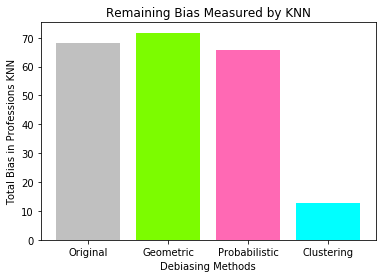

In [124]:
x = np.arange(4)
bias = [measure_bias_from_dict(props_o), measure_bias_from_dict(props_b), measure_bias_from_dict(props_p), measure_bias_from_dict(props_c)]

fig, ax = plt.subplots()
plt.bar(x, bias,color=['silver','lawngreen','hotpink','cyan'])
plt.xlabel('Debiasing Methods')
plt.ylabel('Total Bias in Professions KNN')
plt.title('Remaining Bias Measured by KNN')
plt.xticks(x, ('Original', 'Geometric', 'Probabilistic', 'Clustering'))
plt.show()


Examples of several Professions

In [85]:
profession_examples = ['architect','artist','astronomer','commander','dancer','judge','lawyer', 'singer','teacher']


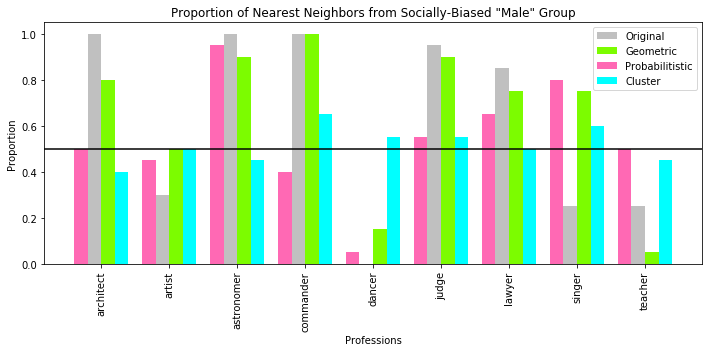

In [120]:
ind = np.arange(len(p_ex))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
 
rects1 = ax.bar(ind - width/2, [props_o[p] for p in profession_examples], width,
                label='Original', color='silver')
rects2 = ax.bar(ind + width/2, [props_b[p] for p in profession_examples], width,
                label='Geometric',color='lawngreen')
rects3 = ax.bar(ind - width*(3/2), [props_p[p] for p in profession_examples], width,
                label='Probabilitistic',color='hotpink')
rects4 = ax.bar(ind + width*(3/2), [props_c[p] for p in profession_examples], width,
                label='Cluster',color='cyan')

ax.set_ylabel('Proportion')
ax.set_title('Proportion of Nearest Neighbors from Socially-Biased "Male" Group')
ax.set_xticks(ind)
ax.set_xlabel('Professions')
ax.set_xticklabels(p_ex,rotation=90)
ax.legend()

ax.axhline(.5,0,1,c='k')

fig.tight_layout()

plt.show()